# Homework 5 - Visualization, Analysis, and Outliers
CS 133  
Spring 2025  
v1.0 (with edits from 1.1)

---

## 1. Visualization Best Practices

1.1 (10pts) We have looked at many of the best practices for creating visualizations of data. Search the web for an example of a visualization (e.g. chart, graph, etc.) that breaks one or more of the rules we discussed. Copy the chart into your notebook in the cell below. (Usually you can use copy/paste but if that doesn't work use the markdown syntax `![title](filename)`)

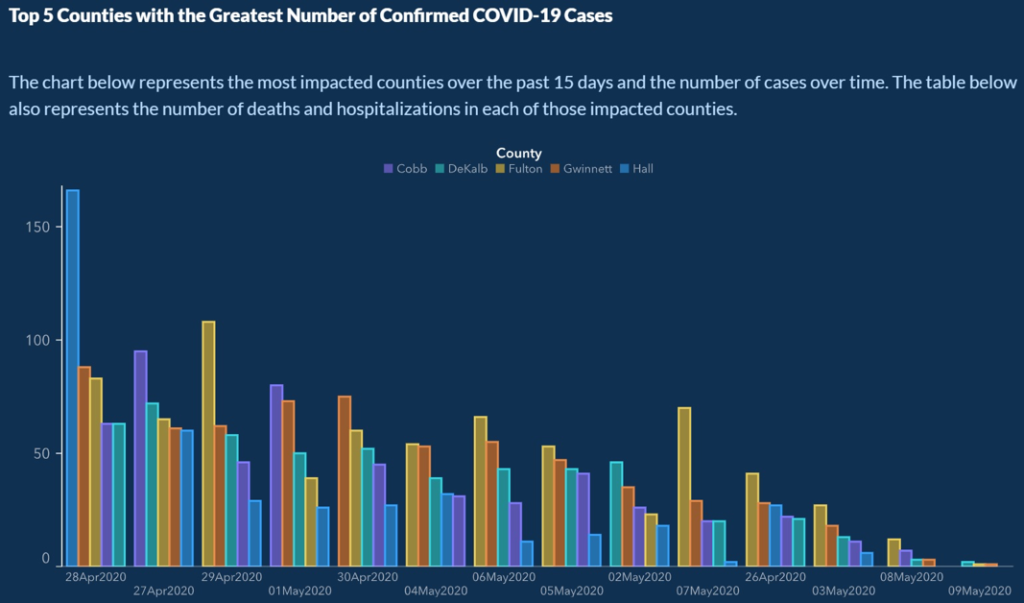

1.1 (5 pts) What story is the chart attempting to tell?

This chart is trying to show the deaths and hospitalizations from confirmed cases of covid across five counties in Georgia over a period of time 26 Apr 2020 - 09 May 2020. They are tyring to show 15 days of data (its a range of 13 days) with a  faked downward (right skew) trend.

1.2 (10 pts) Analyze the chart for best practices (both good and bad) and explain how it might have been improved

The Bad:
- The dates aren't in order in the x axis
- Colors are hard to read given a blue backgrund and lacks strong contrast
- Lack of normalized proportions, we have no metric to know if say if a county is a largely populated one (and in turn more cases) or not each county should be normalized per capita if they are going to be compared to each other
- Movement of county colors makes it harder to track each county day to day (if it was in order)

The Good:
- I think the choice of a bar chart broken into catagorical dates could have presented well.
- Y-axis scaling isn't a terribly executed either the way this chart presents Hall county was hit the worst but they were able to fit it without making the rest of the data looking too shrunk or stretched.

What I might have done differently:
- I might have explored other options to display this information, it might have been good to show say a heatmap of cases in the shape of Georgia where the scale showed the number of cases with color instead.
- Obvious color changes and reordering of the counties and making sure our x-axis calender follows the proper flow of time.

## 2. Exploratory Analysis

Using the provided dataset, demonstrate how to perform exploratory analysis for each of the three steps given in the prompts below. You may add as many code and text cells as needed.

2.1 (5pts) Understand the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
stores = pd.read_csv("homework-5.csv")

In [2]:
stores.info()
stores.sort_values(["id"]).groupby('id').head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18034 entries, 0 to 18033
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       18034 non-null  int64 
 1   date     18034 non-null  object
 2   meal     18034 non-null  object
 3   coffee   18034 non-null  int64 
 4   fries    18034 non-null  int64 
 5   burgers  18034 non-null  int64 
 6   sodas    18034 non-null  int64 
 7   nuggets  18034 non-null  int64 
 8   salad    18034 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.2+ MB


,id,date,meal,coffee,fries,burgers,sodas,nuggets,salad
18020,0,2023-10-11,dinner,0,5,2,3,3,0
17992,0,2023-10-11,dinner,0,4,3,3,2,0
17993,0,2023-10-25,breakfast,2,0,0,0,0,0
18000,0,2023-10-26,lunch,0,0,0,1,1,1
42,0,2023-10-30,lunch,0,0,0,2,2,1
18022,1,2023-10-13,breakfast,2,0,0,0,0,0
13,1,2023-10-21,dinner,0,2,2,2,0,0
17987,1,2023-10-23,dinner,0,1,1,1,0,0
17990,1,2023-10-24,breakfast,3,0,0,0,0,0
17996,1,2023-10-18,dinner,0,1,2,2,0,0


In [3]:
#Breaking up dataset by stores
store0 = stores[stores['id']==0]
store1 = stores[stores['id']==1]
store2 = stores[stores['id']==2]
store3 = stores[stores['id']==3]


print("Store 0:\n" + str(store0.head()) + "\n" )
print("Store 1:\n" + str(store1.head()) + "\n" )
print("Store 2:\n" + str(store2.head()) + "\n" )
print("Store 3:\n" + str(store3.head()) + "\n" )


Store 0:
    id        date       meal  coffee  fries  burgers  sodas  nuggets  salad
4    0  2023-10-23  breakfast       2      0        0      0        0      0
7    0  2023-10-02      lunch       0      0        0      2        2      1
9    0  2023-10-06     dinner       0      5        4      4        2      0
21   0  2023-10-02      lunch       0      2        1      0        0      0
28   0  2023-10-12  breakfast       3      0        0      0        0      0

Store 1:
    id        date       meal  coffee  fries  burgers  sodas  nuggets  salad
13   1  2023-10-21     dinner       0      2        2      2        0      0
18   1  2023-10-01      lunch       0      1        1      0        0      0
20   1  2023-10-30  breakfast       1      0        0      0        0      0
22   1  2023-10-08      lunch       0      1        1      0        0      0
31   1  2023-10-18     dinner       0      2        3      1        0      0

Store 2:
    id        date    meal  coffee  fries  burg

2.2 (5pts) Identify relationships between features

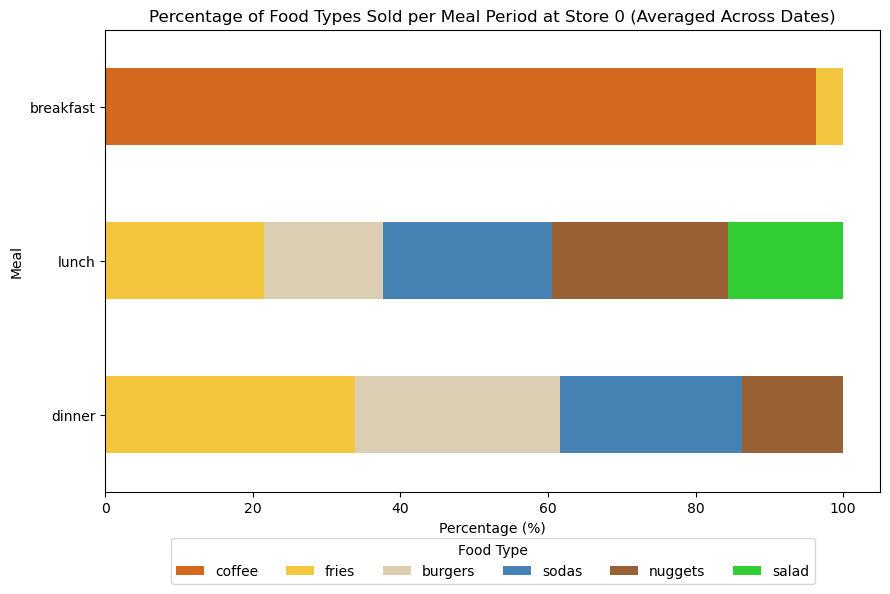

In [4]:
store0_summed = store0.drop(columns=['id']).groupby(['meal', 'date']).sum()
store0_meal_avg = store0_summed.groupby('meal').mean()


meal_order = ['breakfast', 'lunch', 'dinner']
store0_meal_avg = store0_meal_avg.loc[meal_order[::-1]]
store0_meal_normalized = store0_meal_avg.div(store0_meal_avg.sum(axis=1), axis=0) * 100

colors = ['#D2691E', '#f4c63e', '#dbceb2', '#4682B4', '#996034', '#32CD32']

store0_meal_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

plt.title('Percentage of Food Types Sold per Meal Period at Store 0 (Averaged Across Dates)')
plt.xlabel('Percentage (%)')
plt.ylabel('Meal')
plt.legend(title='Food Type', bbox_to_anchor=(0.5, -0.15), loc='center', ncol=6)

plt.show()

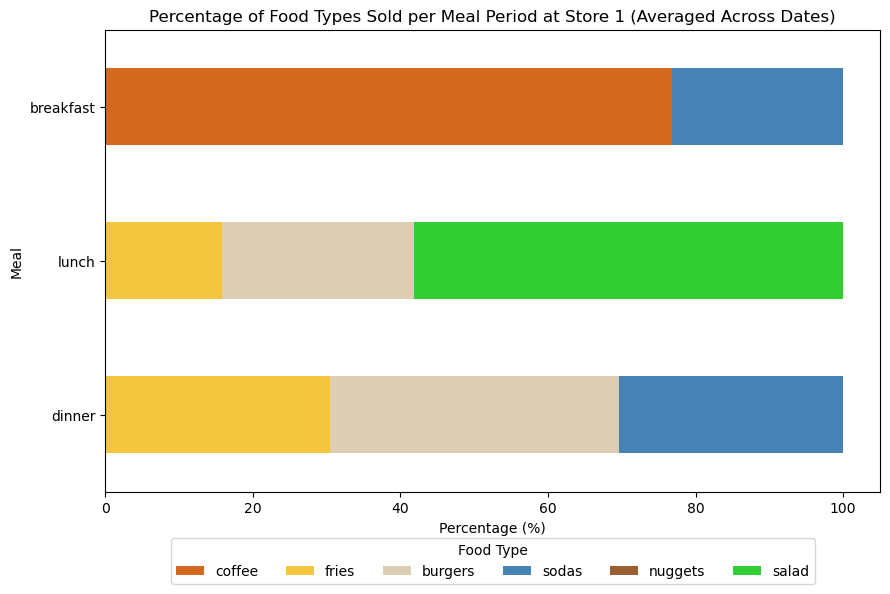

In [5]:
store1_summed = store1.drop(columns=['id']).groupby(['meal', 'date']).sum()
store1_meal_avg = store1_summed.groupby('meal').mean()

meal_order = ['breakfast', 'lunch', 'dinner']
store1_meal_avg = store1_meal_avg.loc[meal_order[::-1]]
store1_meal_normalized = store1_meal_avg.div(store1_meal_avg.sum(axis=1), axis=0) * 100

colors = ['#D2691E', '#f4c63e', '#dbceb2', '#4682B4', '#996034', '#32CD32']

store1_meal_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

plt.title('Percentage of Food Types Sold per Meal Period at Store 1 (Averaged Across Dates)')
plt.xlabel('Percentage (%)')
plt.ylabel('Meal')
plt.legend(title='Food Type', bbox_to_anchor=(0.5, -0.15), loc='center', ncol=6)

plt.show()


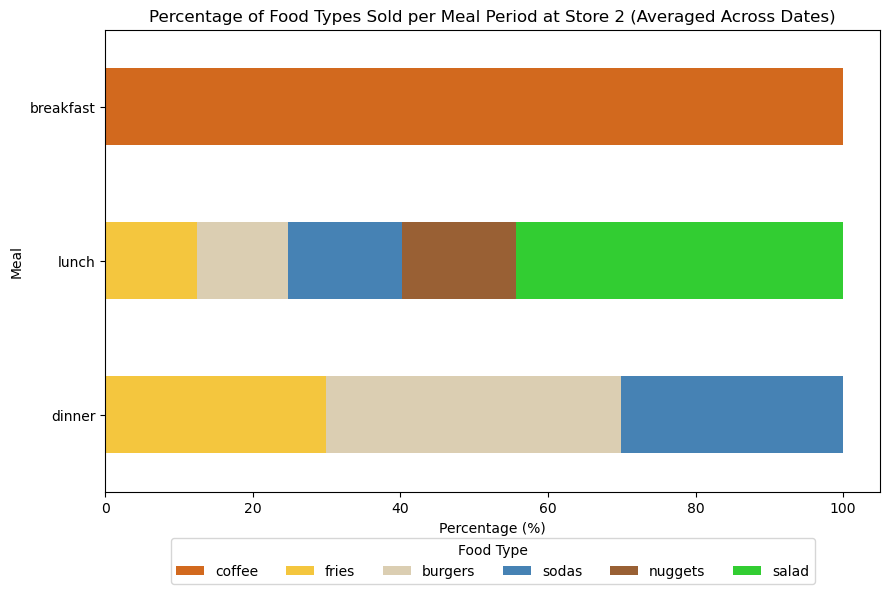

In [6]:
store2_summed = store2.drop(columns=['id']).groupby(['meal', 'date']).sum()
store2_meal_avg = store2_summed.groupby('meal').mean()

meal_order = ['breakfast', 'lunch', 'dinner']
store2_meal_avg = store2_meal_avg.loc[meal_order[::-1]]
store2_meal_normalized = store2_meal_avg.div(store2_meal_avg.sum(axis=1), axis=0) * 100

colors = ['#D2691E', '#f4c63e', '#dbceb2', '#4682B4', '#996034', '#32CD32']

store2_meal_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

plt.title('Percentage of Food Types Sold per Meal Period at Store 2 (Averaged Across Dates)')
plt.xlabel('Percentage (%)')
plt.ylabel('Meal')
plt.legend(title='Food Type', bbox_to_anchor=(0.5, -0.15), loc='center', ncol=6)

plt.show()


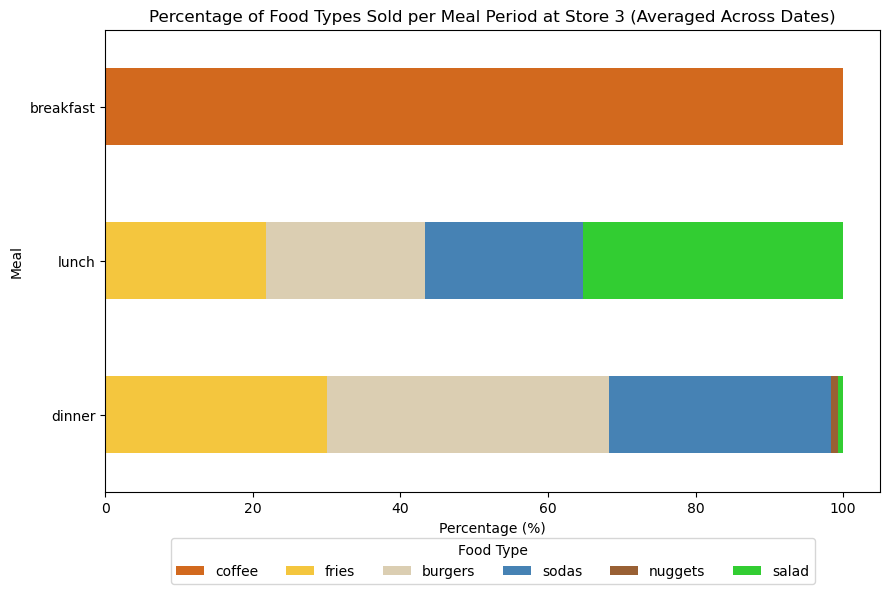

In [7]:
store3_summed = store3.drop(columns=['id']).groupby(['meal', 'date']).sum()
store3_meal_avg = store3_summed.groupby('meal').mean()

meal_order = ['breakfast', 'lunch', 'dinner']
store3_meal_avg = store3_meal_avg.loc[meal_order[::-1]]
store3_meal_normalized = store3_meal_avg.div(store3_meal_avg.sum(axis=1), axis=0) * 100

colors = ['#D2691E', '#f4c63e', '#dbceb2', '#4682B4', '#996034', '#32CD32']

store3_meal_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors)

plt.title('Percentage of Food Types Sold per Meal Period at Store 3 (Averaged Across Dates)')
plt.xlabel('Percentage (%)')
plt.ylabel('Meal')
plt.legend(title='Food Type', bbox_to_anchor=(0.5, -0.15), loc='center', ncol=6)

plt.show()


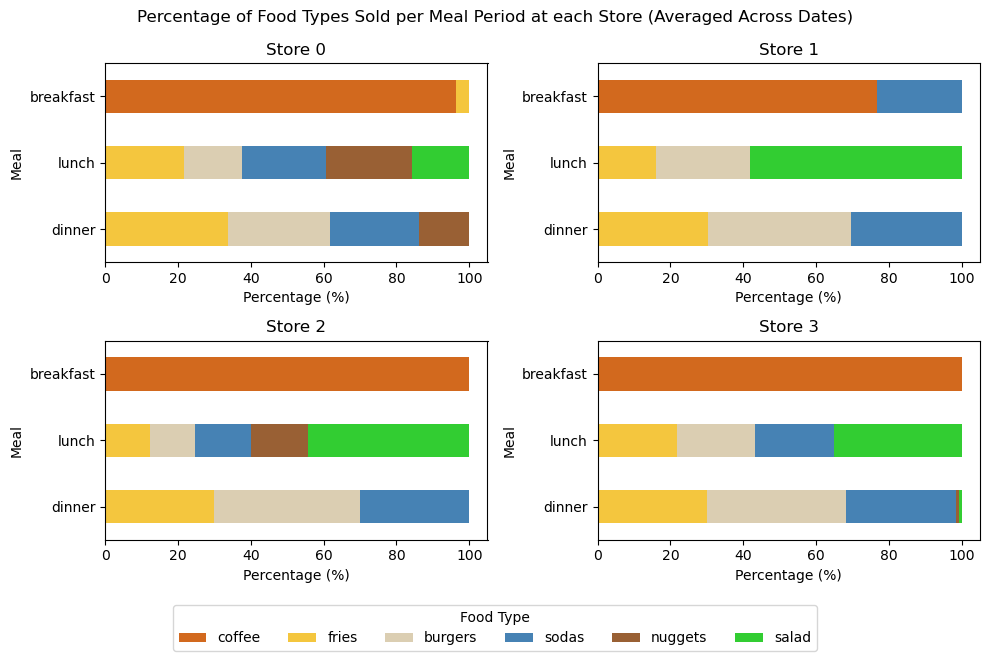

In [8]:
import matplotlib.pyplot as plt
import pandas as pd


fig, axes = plt.subplots(2, 2, figsize=(40, 12))
fig.suptitle('Percentage of Food Types Sold per Meal Period at each Store (Averaged Across Dates)')

# Store 0
store0_meal_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Store 0')
axes[0, 0].set_xlabel('Percentage (%)')
axes[0, 0].set_ylabel('Meal')
fig.legend(title='Food Type', bbox_to_anchor=(0.5, -0.05), loc='center', ncol=6)

# Store 1
store1_meal_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Store 1')
axes[0, 1].set_xlabel('Percentage (%)')
axes[0, 1].set_ylabel('Meal')

# Store 2
store2_meal_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Store 2')
axes[1, 0].set_xlabel('Percentage (%)')
axes[1, 0].set_ylabel('Meal')

# Store 3
store3_meal_normalized.plot(kind='barh', stacked=True, figsize=(10, 6), color=colors, ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Store 3')
axes[1, 1].set_xlabel('Percentage (%)')
axes[1, 1].set_ylabel('Meal')

https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F651d59eb-c310-4fa6-afcc-8cb4cce74e4b_1125x1627.png


plt.show()


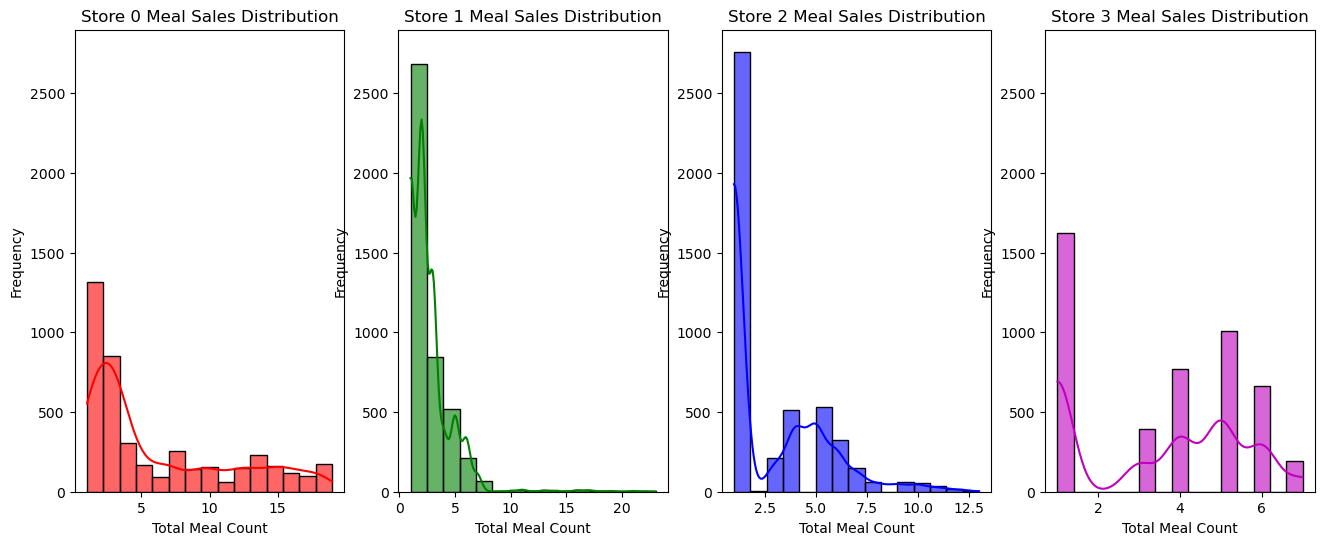

In [9]:
stores['total_meals'] = stores[['coffee', 'fries', 'burgers', 'sodas', 'nuggets', 'salad']].sum(axis=1)

fig, axes = plt.subplots(1, 4, figsize=(16, 6))

# Store 0
sns.histplot(stores[stores['id'] == 0]['total_meals'], kde=True, ax=axes[0], bins=15, alpha=0.6, color = 'r')
axes[0].set_title('Store 0 Meal Sales Distribution')
axes[0].set_xlabel('Total Meal Count')
axes[0].set_ylabel('Frequency')

# Store 1
sns.histplot(stores[stores['id'] == 1]['total_meals'], kde=True, ax=axes[1], bins=15, alpha=0.6,color = 'g')
axes[1].set_title('Store 1 Meal Sales Distribution')
axes[1].set_xlabel('Total Meal Count')
axes[1].set_ylabel('Frequency')

# Store 2
sns.histplot(stores[stores['id'] == 2]['total_meals'], kde=True, ax=axes[2], bins=15, alpha=0.6,color = 'b')
axes[2].set_title('Store 2 Meal Sales Distribution')
axes[2].set_xlabel('Total Meal Count')
axes[2].set_ylabel('Frequency')

# Store 3
sns.histplot(stores[stores['id'] == 3]['total_meals'], kde=True, ax=axes[3], bins=15, alpha=0.6, color = 'm')
axes[3].set_title('Store 3 Meal Sales Distribution')
axes[3].set_xlabel('Total Meal Count')
axes[3].set_ylabel('Frequency')

max_frequency = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1], axes[2].get_ylim()[1], axes[3].get_ylim()[1])

for ax in axes:
    ax.set_ylim(0, max_frequency)

plt.show()

2.3 (5pts) Describe the shape of the data 

In [10]:
import scipy.stats as stats

def describe_skewness(data, store_id):
    skewness = stats.skew(data)
    
    if skewness > 0:
        skew_description = "Positive right skew"
    elif skewness < 0:
        skew_description = "Negative left skew"
    else:
        skew_description = "Symmetrical (uniform distribution)"
    
    print("Store " + str(store_id) + " Skewness: " + str(round(skewness, 2)) + " (" + skew_description + ")")

for store_id, group in stores.groupby('id'):
    describe_skewness(group['total_meals'], store_id=store_id)


Store 0 Skewness: 0.95 (Positive right skew)
Store 1 Skewness: 3.64 (Positive right skew)
Store 2 Skewness: 1.24 (Positive right skew)
Store 3 Skewness: -0.08 (Negative left skew)


### 3. Outlier Detection and Missing Data

3.1 (5pts) Calculate the Z-scores for one of the food columns. List all the rows that have a Z-score greater than 3.

In [38]:
from scipy.stats import zscore
stores['coffee_zscore'] = zscore(stores['coffee'])

outlier_coffee = stores[stores['coffee_zscore'] > 3]

outlier_coffee

,id,date,meal,coffee,fries,burgers,sodas,nuggets,salad,total_meals,coffee_zscore
28,0,2023-10-12,breakfast,3,0,0,0,0,0,3,3.307206
36,1,2023-10-28,breakfast,3,0,0,0,0,0,3,3.307206
43,0,2023-10-24,breakfast,3,0,0,0,0,0,3,3.307206
51,0,2023-10-26,breakfast,3,0,0,0,0,0,3,3.307206
66,1,2023-10-05,breakfast,3,0,0,0,0,0,3,3.307206
...,...,...,...,...,...,...,...,...,...,...,...
17990,1,2023-10-24,breakfast,3,0,0,0,0,0,3,3.307206
18013,1,2023-10-18,breakfast,3,0,0,0,0,0,3,3.307206
18014,1,2023-10-15,breakfast,3,0,0,0,0,0,3,3.307206
18026,0,2023-10-11,breakfast,3,0,0,0,0,0,3,3.307206


3.2 (5pts) Calculate the Tukey Fence for one of the food columns and use it to list all the rows that fall outside it.

In [35]:
stores['coffee'].describe()

count    18034.000000
mean         0.360763
std          0.798048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: coffee, dtype: float64

In [36]:
Q1 = stores['coffee'].quantile(0.25)
Q3 = stores['coffee'].quantile(0.75)
IQR = Q3 - Q1

outer_lower_fence = Q1 - 3 * IQR
outer_upper_fence = Q3 + 3 * IQR

all_outliers = stores[(stores['coffee'] < outer_lower_fence) | (stores['coffee'] > outer_upper_fence)]

all_outliers


,id,date,meal,coffee,fries,burgers,sodas,nuggets,salad,total_meals,coffee_zscore
4,0,2023-10-23,breakfast,2,0,0,0,0,0,2,2.054114
19,3,2023-10-23,breakfast,1,0,0,0,0,0,1,0.801023
20,1,2023-10-30,breakfast,1,0,0,0,0,0,1,0.801023
26,2,2023-10-24,breakfast,1,0,0,0,0,0,1,0.801023
28,0,2023-10-12,breakfast,3,0,0,0,0,0,3,3.307206
...,...,...,...,...,...,...,...,...,...,...,...
18022,1,2023-10-13,breakfast,2,0,0,0,0,0,2,2.054114
18026,0,2023-10-11,breakfast,3,0,0,0,0,0,3,3.307206
18031,1,2023-10-17,breakfast,1,0,0,0,0,0,1,0.801023
18032,1,2023-10-04,breakfast,1,0,0,0,0,0,1,0.801023


3.3 (2pts) What type of errors do you think caused the outliers? Explain your answer.

There could be all kinds of things that caused the outliers with coffee a few I can think of are:
- Variance in logging method based on employees, maybe some employees count refills as part of their coffee count for the day
- Locations of each store, maybe store0 is right next to a buiness plaza and store3 is in a small town
- Coffee events and or promotions, perhaps store0 had a promotion of buy a coffee and get a small bag of fries where store3 didn't
- Sampling Bias, if these stores are part of one chain someone wanting to show good sales of the franchieses might have selected the higher preforming stores (in terms of coffee)

---

### Submission Instructions

Be sure to ***SAVE YOUR WORK***!  

Next, select Kernel -> Restart Kernel and Run All Cells...

Make sure there are no errors.

Then select File->Save and Export Notebook as->HTML and submit your HTML file to Canvas.